<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%202/Modulo_2_Ejercicio_4_EDA_Visualizacion_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ejercicio 4: Análisis Exploratorio de Datos (EDA) y Visualización**
## Aplicación de técnicas de EDA y visualización para comprender la estructura de los datos.



## Introducción

En este ejercicio, realizaremos un **Análisis Exploratorio de Datos (EDA)** para comprender la estructura y relaciones de los datos en un contexto de control de calidad industrial.  
El análisis exploratorio permite identificar patrones, anomalías y relaciones entre variables antes de aplicar modelos de Machine Learning.

### Objetivos del ejercicio:
- Calcular estadísticas avanzadas: **percentiles, kurtosis, skewness**.
- Analizar la distribución de las variables mediante **histogramas y boxplots**.
- Identificar correlaciones entre variables utilizando una **matriz de correlación y un heatmap**.
- Explorar la evolución de los datos en el tiempo con **gráficos de líneas**.
- Generar **insights y conclusiones** a partir de las visualizaciones.

### Conceptos clave:
- Análisis exploratorio (EDA)  
- Matriz de correlación  
- Interpretación de visualizaciones  


In [1]:

# Celda 1: Importación de librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

# Configuración de estilos para visualización
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Librerías importadas correctamente.")


Librerías importadas correctamente.



## Descripción del Dataset

Para este ejercicio, utilizaremos el dataset **"Control de calidad en motores industriales"**, alojado en GitHub.  
Este dataset contiene información sobre la vida útil y desempeño de motores industriales.

### **Fuente del dataset:**  
- **CSV:** [Control de calidad en motores industriales](https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_motores_industriales.csv)

### **Estructura del dataset:**
| Columna                | Descripción |
|------------------------|-------------|
| ID_motor              | Identificador único del motor |
| Horas_operación       | Horas de funcionamiento |
| Temperatura_núcleo    | Temperatura del núcleo en °C |
| Vibracion            | Frecuencia de vibración en Hz |
| Consumo_energía      | Consumo energético en kWh |
| Presión_sistema      | Presión del sistema en bar |
| Corriente_motor      | Corriente en Amperios |
| Velocidad_rotación   | Velocidad de rotación en RPM |
| Desgaste_rodamientos | Desgaste medido en mm |
| Fecha_instalación    | Fecha en la que se instaló el motor |
| Vida_util_restante   | Variable objetivo: estimación de la vida útil restante en horas |


In [4]:

# Celda 2: Cargar el dataset desde GitHub

url_csv = "https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_motores_industriales.csv"
df = pd.read_csv(url_csv, parse_dates=["Fecha_instalación"])

# Mostrar las primeras filas del dataset
df.head()


,ID_motor,Horas_operacion,Temperatura_nucleo,Vibración,Consumo_energia,Tipo_aceite,Presion_sistema,Corriente_motor,Velocidad_rotacion,Desgaste_rodamientos,Fecha_instalación,Vida_util_restante
0,1,7770,81.610466,46.604460,318.231332,Aceite_A,2.295591,11.211465,2438,0.785107,2022-12-17,11445.208345
1,2,1360,68.652613,56.835307,347.379296,Aceite_C,2.236013,8.837599,1948,0.424782,2020-01-05,14162.529287
2,3,5890,62.997601,57.301942,276.613228,Aceite_C,1.896182,10.717229,2141,0.546722,2022-11-01,11713.160348
3,4,5691,61.966363,60.366103,259.887709,Aceite_C,1.642541,11.554843,1413,0.481573,2015-07-13,12164.564367
4,5,11784,84.117229,44.860333,334.598166,Aceite_B,2.078624,8.298306,2064,0.610559,2015-11-16,9181.087673


In [5]:

# Celda 3: Cálculo de estadísticas avanzadas

# Seleccionar solo las columnas numéricas (excluyendo datetime)
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calcular estadísticas avanzadas solo para variables numéricas
estadisticas = df[numerical_cols].describe(percentiles=[0.25, 0.5, 0.75])
estadisticas.loc["kurtosis"] = df[numerical_cols].kurtosis()
estadisticas.loc["skewness"] = df[numerical_cols].skew()

print("Estadísticas avanzadas calculadas.")
estadisticas



Estadísticas avanzadas calculadas.


,ID_motor,Horas_operacion,Temperatura_nucleo,Vibración,Consumo_energia,Presion_sistema,Corriente_motor,Velocidad_rotacion,Desgaste_rodamientos,Vida_util_restante
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,6244.235167,75.027511,49.863085,300.082967,2.000696,10.007914,2207.092033,0.499792,12216.841385
std,8660.398374,3327.781441,10.021843,14.951038,50.005022,0.498891,2.004527,807.518940,0.100691,1746.364013
min,1.000000,500.000000,37.189737,-11.504394,101.459270,0.120544,2.346888,800.000000,0.052722,7006.742079
25%,7500.750000,3346.000000,68.291257,39.790415,266.559852,1.662595,8.660223,1508.000000,0.431835,10789.140658
50%,15000.500000,6252.500000,75.021604,49.864312,299.989108,2.002215,9.991185,2212.000000,0.499697,12210.558100
75%,22500.250000,9132.000000,81.781967,59.983270,333.534327,2.338359,11.346468,2904.000000,0.567970,13656.436919
max,30000.000000,11999.000000,114.385030,106.771543,494.998180,4.038926,17.771749,3599.000000,0.925333,16936.528035
kurtosis,-1.200000,-1.202917,0.006954,-0.004028,-0.043762,0.005344,0.045013,-1.195705,-0.008658,-0.983711
skewness,0.000000,0.001252,-0.003149,-0.010094,0.012989,-0.016199,0.025320,-0.008629,0.003262,0.001162


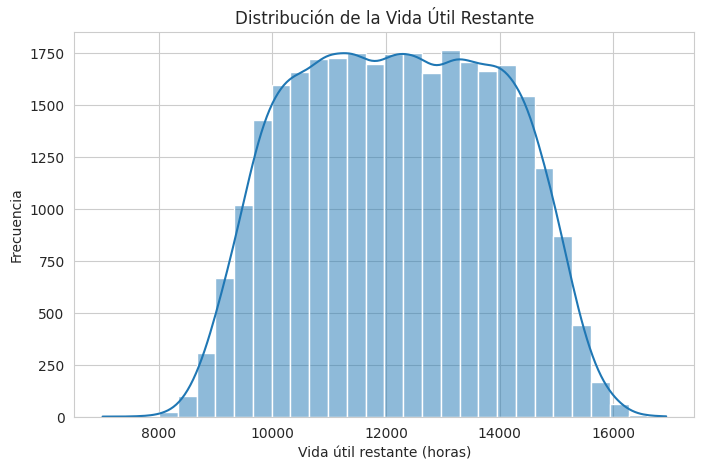

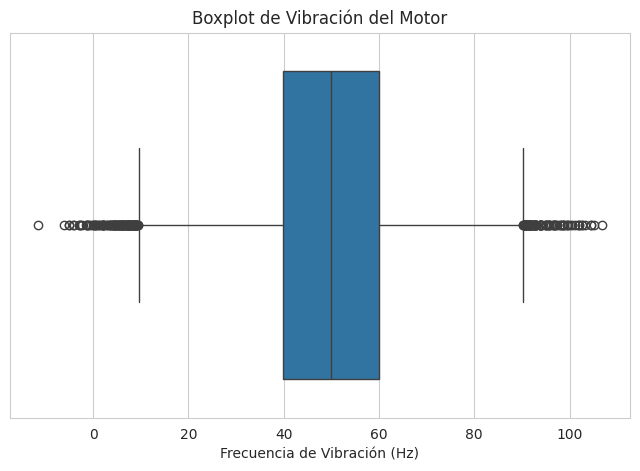

In [6]:

# Celda 4: Análisis de la distribución con histogramas y boxplots

# Histograma de la variable Vida_util_restante
plt.figure(figsize=(8,5))
sns.histplot(df["Vida_util_restante"], bins=30, kde=True)
plt.title("Distribución de la Vida Útil Restante")
plt.xlabel("Vida útil restante (horas)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de la variable Vibración
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Vibración"])
plt.title("Boxplot de Vibración del Motor")
plt.xlabel("Frecuencia de Vibración (Hz)")
plt.show()


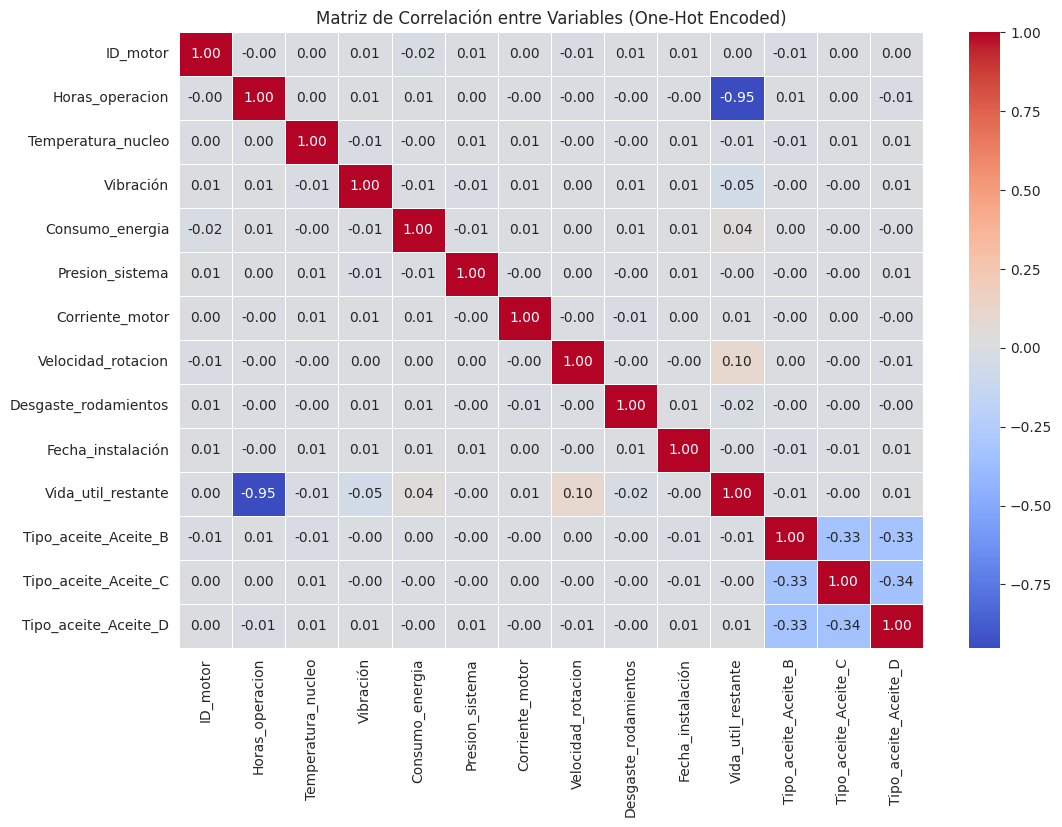

In [7]:

# Celda 5: Matriz de correlación con One-Hot Encoding

# Aplicar One-Hot Encoding a las variables categóricas antes de calcular la correlación
df_encoded = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación
correlacion = df_encoded.corr()

# Crear un heatmap de correlaciones
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables (One-Hot Encoded)")
plt.show()


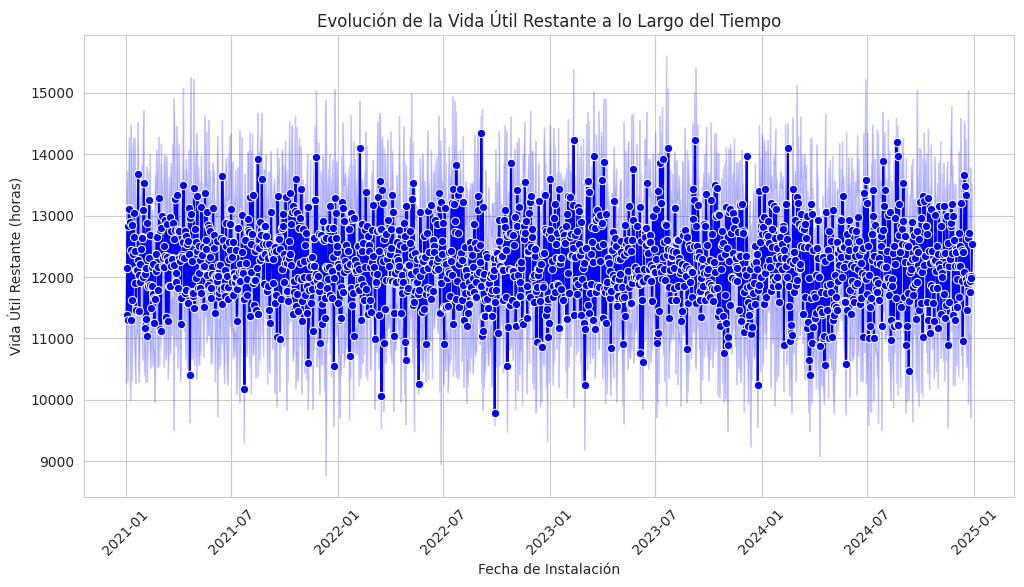

In [8]:

# Celda 6: Análisis de la evolución temporal de la vida útil restante

# Convertir fecha de instalación a datetime y ordenar por fecha
df["Fecha_instalación"] = pd.to_datetime(df["Fecha_instalación"], errors='coerce')
df_sorted = df.sort_values("Fecha_instalación")

# Filtrar fechas posteriores a 2021-01-01
df_filtered = df_sorted[df_sorted["Fecha_instalación"] > '2021-01-01']

# Graficar la evolución de la vida útil restante en el tiempo
plt.figure(figsize=(12,6))
sns.lineplot(x="Fecha_instalación", y="Vida_util_restante", data=df_filtered, marker="o", color="b")
plt.title("Evolución de la Vida Útil Restante a lo Largo del Tiempo")
plt.xlabel("Fecha de Instalación")
plt.ylabel("Vida Útil Restante (horas)")
plt.xticks(rotation=45)
plt.show()



## Conclusiones

En este ejercicio hemos aplicado técnicas de **Análisis Exploratorio de Datos (EDA)** para comprender la estructura de los datos en motores industriales.

### Puntos clave:
- Se calcularon **estadísticas avanzadas** como percentiles, kurtosis y skewness para evaluar la distribución de los datos.
- Se analizaron **distribuciones** con histogramas y boxplots, identificando posibles valores atípicos.
- Se generó una **matriz de correlación** para explorar relaciones entre variables clave.
- Se realizó un **análisis temporal** para evaluar la evolución de la vida útil restante en el tiempo.

### Posibles mejoras:
- Aplicar técnicas para la detección y eliminación de valores atípicos en variables críticas.
- Descomponer la variable de fecha de instalación en componentes (año, mes, día) para análisis más detallados.
- Explorar relaciones no lineales entre variables con técnicas de Machine Learning.
